In [404]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

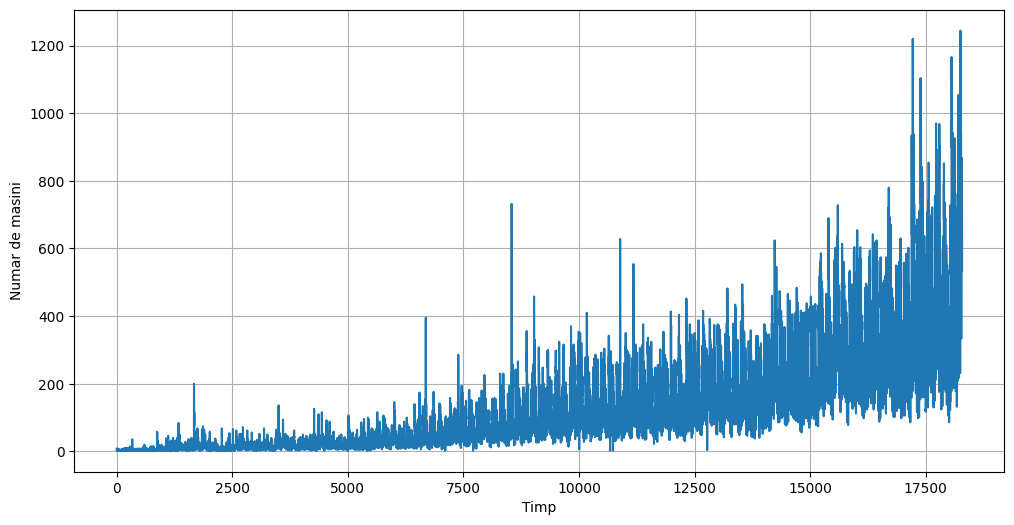

Frecvența de eșantionare este 0.0002777777777777778 Hz


In [405]:
# Pct a
dataset = pd.read_csv('data/Train.csv')
dataset['Datetime'] = pd.to_datetime(dataset['Datetime'], format='%d-%m-%Y %H:%M')

dateTime = dataset.Datetime.values
count = dataset.Count.values

plt.figure(figsize=(12, 6))
plt.plot(count)
plt.xlabel('Timp')
plt.ylabel('Numar de masini')
plt.grid(True)

if not os.path.exists('pct_a'):
    os.mkdir('pct_a')

plt.savefig(os.path.join('pct_a', f"pct_a.png"))
plt.savefig(os.path.join('pct_a', f"pct_a.pdf"))

plt.show()

start_time = dataset['Datetime'].iloc[0]
end_time = dataset['Datetime'].iloc[-1]
diff = end_time - start_time

total_samples = len(dataset)
sampling_rate = total_samples / diff.total_seconds()
# print(f'Frecvența de eșantionare este {sampling_rate} Hz')

# Pentru acest set de date fs este:
fs = 1 / (dataset['Datetime'].iloc[1] - dataset['Datetime'].iloc[0]).total_seconds()
print(f'Frecvența de eșantionare este {fs} Hz')

In [406]:
# Pct b
print(f'Intervalul de timp acoperit de setul de date este {diff}')

Intervalul de timp acoperit de setul de date este 761 days 23:00:00


In [407]:
# Pct c
max_frequency = fs / 2
print(f'Frecvența maximă este {max_frequency} Hz')

Frecvența maximă este 0.0001388888888888889 Hz


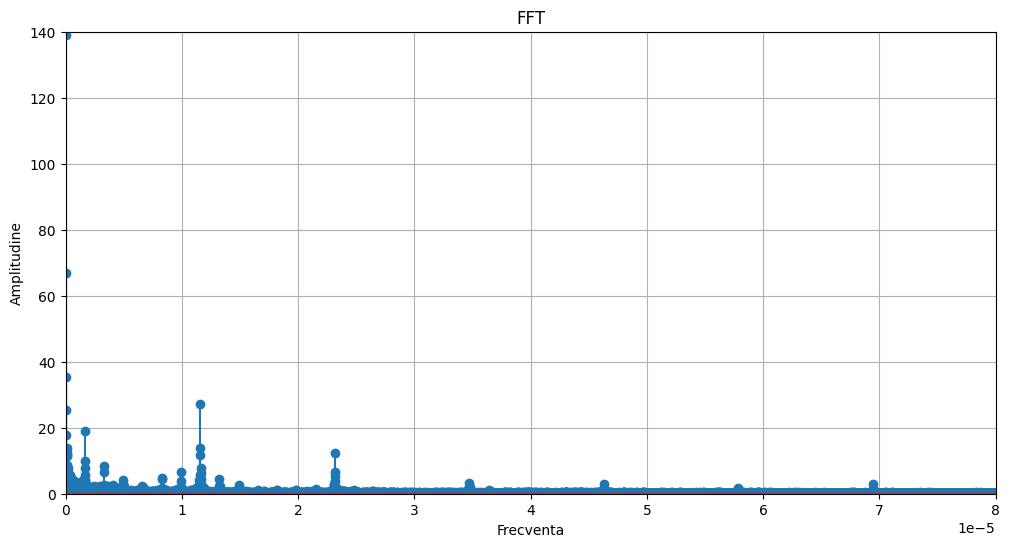

In [408]:
# Pct d
N = len(count)
fft_result = np.fft.fft(count)
fft_result = np.abs(fft_result / N)
fft_result = fft_result[:N // 2]
signal = np.fft.ifft(fft_result)

freq = fs * np.linspace(0, N // 2, N // 2) / N

plt.figure(figsize=(12, 6))
plt.stem(freq, fft_result)
plt.xlabel('Frecventa')
plt.ylabel('Amplitudine')
plt.title("FFT")
plt.xlim((0, 0.00008))
plt.ylim((0, 140))
plt.grid(True)

if not os.path.exists('pct_d'):
    os.mkdir('pct_d')

plt.savefig(os.path.join('pct_d', f"pct_d.png"))
plt.savefig(os.path.join('pct_d', f"pct_d.pdf"))

plt.show()

Semnalul prezinta o componenta continua? True la frecventa 0.0 Hz si anume 138.95811461067368


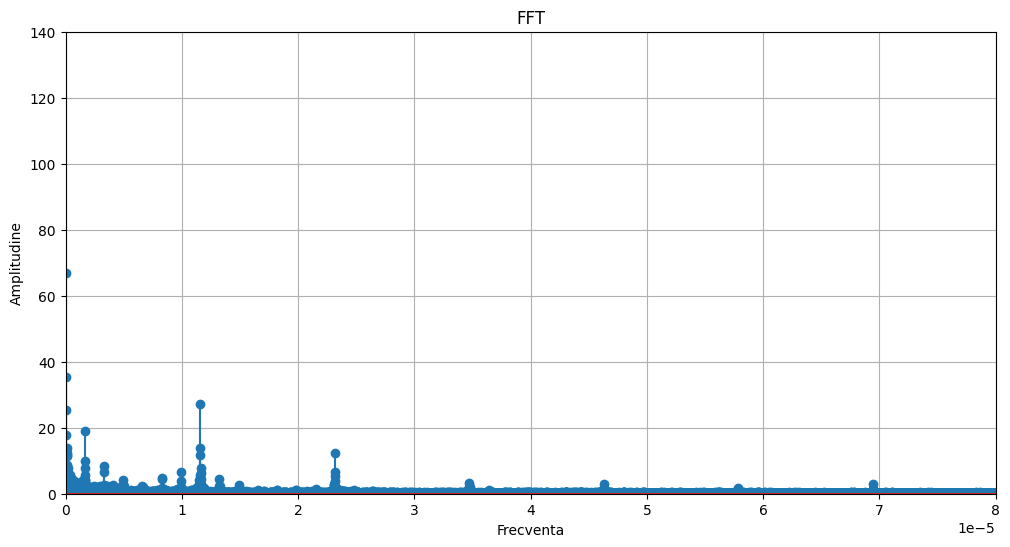

In [409]:
# Pct e
# Semnalul prezinta o componenta continua pentru frecventa 0 Hz
freq_0 = freq[np.argmax(fft_result)]
componenta_continua = freq_0 == 0
print(f'Semnalul prezinta o componenta continua? {componenta_continua} la frecventa {freq_0} Hz si anume {np.max(fft_result)}')

fft_result[np.argmax(fft_result)] = 0

plt.figure(figsize=(12, 6))
plt.stem(freq, fft_result)
plt.xlabel('Frecventa')
plt.ylabel('Amplitudine')
plt.title("FFT")
plt.xlim((0, 0.00008))
plt.ylim((0, 140))
plt.grid(True)

if not os.path.exists('pct_e'):
    os.mkdir('pct_e')

plt.savefig(os.path.join('pct_e', f"pct_e.png"))
plt.savefig(os.path.join('pct_e', f"pct_e.pdf"))

plt.show()

In [410]:
# Pct f
max_index = np.argsort(fft_result)[::-1][:4]

greatest_values = fft_result[max_index]
freq_for_greatest_values = freq[max_index]

for i in range(4):
    print(f'Valoare {i + 1}: {greatest_values[i]}, Frecvență: {freq_for_greatest_values[i]} Hz')
    
# ts = 1 / fs
# np.sort(1/ freq[max_index] / 3600 / 24) => prima valoare e o zi, celelalte nu-mi dau seama ce specifica

Valoare 1: 66.85385766393449, Frecvență: 1.5190734866989925e-08 Hz
Valoare 2: 35.2191729779369, Frecvență: 3.038146973397985e-08 Hz
Valoare 3: 27.10202228761556, Frecvență: 1.1575339968646325e-05 Hz
Valoare 4: 25.21991648404482, Frecvență: 4.557220460096978e-08 Hz


Intervalul ales este 2012-10-08 00:00:00 - 2012-11-08 00:00:00


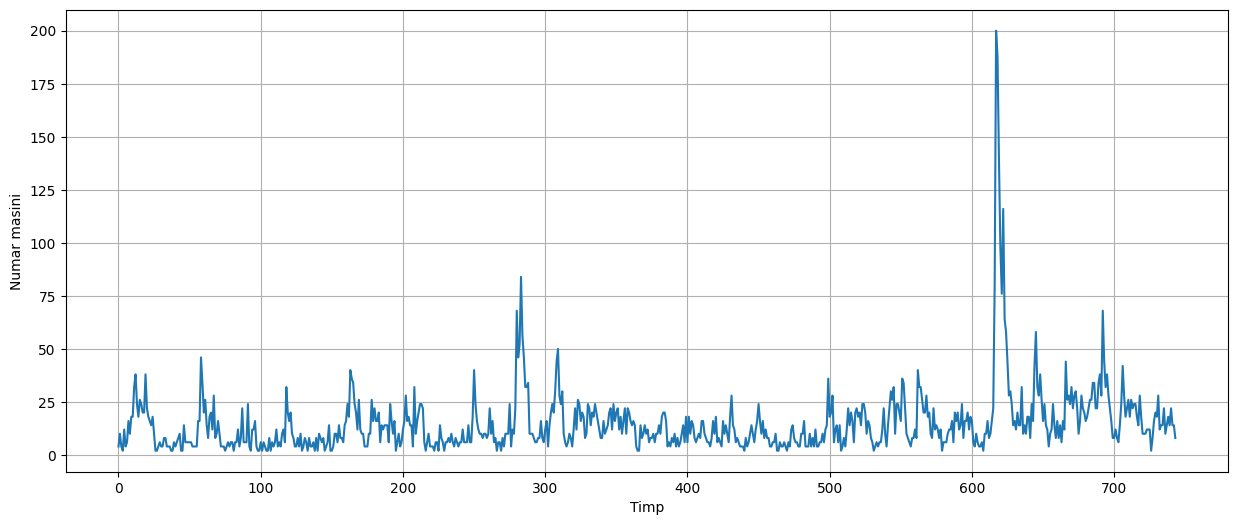

In [411]:
# Pct g
import calendar

start_index = dataset.loc[dataset.index > 1000, 'Datetime'][dataset.Datetime.dt.day_name() == 'Monday'].index[0]
numar_zile = calendar.monthrange(dataset['Datetime'][start_index].year, dataset['Datetime'][start_index].month)[1]
end_index = start_index + numar_zile * 24
print(f'Intervalul ales este {dataset.Datetime[start_index]} - {dataset.Datetime[end_index]}')

plt.figure(figsize=(15, 6))
plt.plot(count[start_index:end_index])
plt.xlabel('Timp')
plt.ylabel('Numar masini')
plt.grid(True)

if not os.path.exists('pct_g'):
    os.mkdir('pct_g')

plt.savefig(os.path.join('pct_g', f"pct_g.png"))
plt.savefig(os.path.join('pct_g', f"pct_g.pdf"))

plt.show()

In [412]:
# Pct h

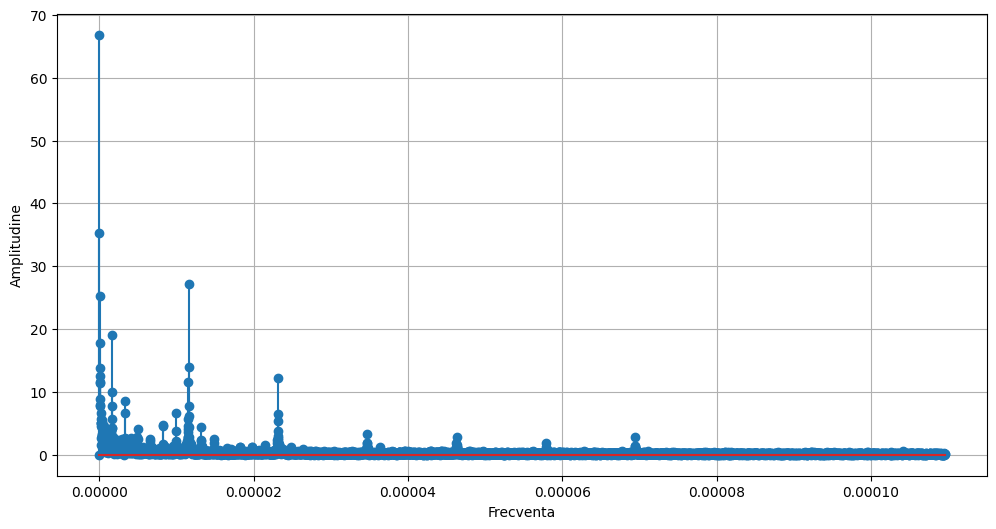

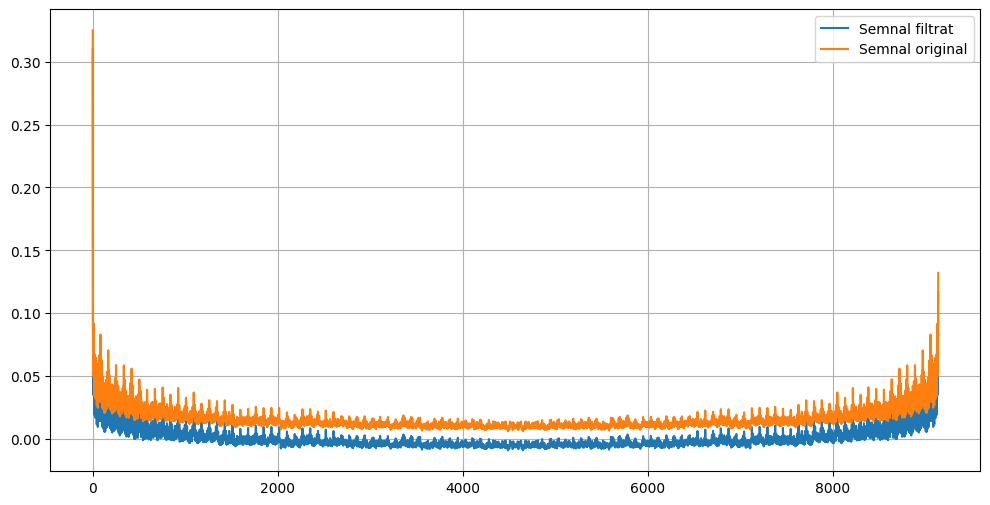

In [413]:
# Pct i
thresh_hold = freq.mean() + freq.std()

freq_copy = freq[freq < thresh_hold]
fft_result_copy = fft_result[freq < thresh_hold]

plt.figure(figsize=(12, 6))
plt.stem(freq_copy, fft_result_copy)
plt.xlabel('Frecventa')
plt.ylabel('Amplitudine')
plt.grid(True)

if not os.path.exists('pct_i'):
    os.mkdir('pct_i')

plt.savefig(os.path.join('pct_i', f"pct_i.png"))
plt.savefig(os.path.join('pct_i', f"pct_i.pdf"))
plt.show()

filtered_signal = np.fft.ifft(fft_result)
plt.figure(figsize=(12, 6))
plt.plot(np.real(filtered_signal), label='Semnal filtrat')
plt.plot(np.real(signal), label='Semnal original')
plt.legend()
plt.grid(True)

plt.savefig(os.path.join('pct_i', f"pct_i_semnal_filtrat.png"))
plt.savefig(os.path.join('pct_i', f"pct_i_semnal_filtrat.pdf"))

plt.show()